1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [28]:
import numpy as np
import math
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1204533)


Number bins: 17

bins:
 [-3.51317128 -3.15423011 -2.79528894 -2.43634777 -2.07740661 -1.71846544
 -1.35952427 -1.0005831  -0.64164193 -0.28270077  0.0762404   0.43518157
  0.79412274  1.15306391  1.51200507  1.87094624  2.22988741  2.58882858]

hist:
 [ 1.  1.  1.  6. 10. 16. 34. 51. 72. 76. 62. 43. 55. 38. 15. 11.  8.]

widths:
 [0.35894117 0.35894117 0.35894117 0.35894117 0.35894117 0.35894117
 0.35894117 0.35894117 0.35894117 0.35894117 0.35894117 0.35894117
 0.35894117 0.35894117 0.35894117 0.35894117 0.35894117]

bins center:
 [-3.33370069 -2.97475953 -2.61581836 -2.25687719 -1.89793602 -1.53899485
 -1.18005369 -0.82111252 -0.46217135 -0.10323018  0.25571099  0.61465215
  0.97359332  1.33253449  1.69147566  2.05041683  2.40935799]


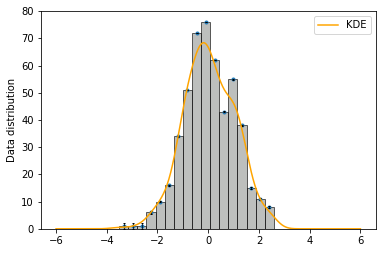

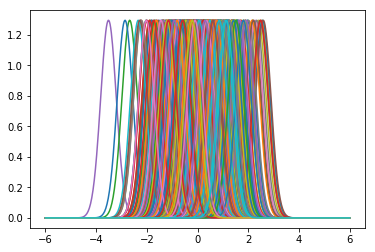

In [2]:
##### Freedman-Diaconis rule to compute a meaningful number of bins
def freeDi(x):
    N = len(x)
    bin_width = 2 * sp.stats.iqr(x)*(N)**(-1/3)
    max_ = np.max(x)
    min_ = np.min(x)
    num_bins = int( ( max_- min_ ) / ( bin_width ) )
    return num_bins

N = 500
mu = 0
sigma = 1
x =  sigma * np.random.randn(N) + mu

n_bins = freeDi(x)
print('\nNumber bins:', n_bins )

fig, axs = plt.subplots()
hist, bins, _ = axs.hist(x, bins=n_bins, color='xkcd:gray', edgecolor='black', alpha=0.6, density=False )
print('\nbins:\n', bins)
print('\nhist:\n', hist)


axs.set_ylabel('Data distribution')
axs.yaxis.set_ticks(np.arange(0,130,10))

widths = bins[1:] - bins[:-1]
print('\nwidths:\n', widths)
bins_center = ( bins[:-1] + bins[1:] ) / 2
print('\nbins center:\n', bins_center)

axs.errorbar( bins_center,hist, yerr=1/np.sqrt(hist), fmt='.' ,ecolor='k', elinewidth=0.7, capsize=1, barsabove=True)

std_dev = 1.06 * x.std() * x.size**(-1/5)
lin = np.linspace(mu-6,mu+6,N)
f,ax = plt.subplots()
gauss = np.zeros( ( len(x), len(lin) ) )

for (i,el) in enumerate(x):
    mean = el
    g = sp.stats.norm(mean,std_dev)
    gauss[i,:] = g.pdf(lin)
    ax.plot( lin,g.pdf(lin) )

# sum
density = np.sum( gauss, axis=0 )

# Normalization
#int_hist = np.sum(hist*widths)
int_hist = sp.integrate.trapz( hist, x=bins[1:] )
density = density / N * ( int_hist )

axs.plot( lin, density, color='orange', label = 'KDE' )
axs.legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2018-12-19 19:56:09--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:1::a27d:4501, 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:1::a27d:4501|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2018-12-19 19:56:09--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf21c5946f57d216dde3ac248a6.dl.dropboxusercontent.com/cd/0/inline/AXwJz6mJnSQ4x2BZPXP0vvwvechfjpKoglEvslNSmyvbCKYcrUUKlDkVWYsA3sK4D6ihEEx4B1W7du47G4xFdzaUn2z2va46sCbh0n9VZy-Aykc4Zo5e24rOdaOLho2jyTN7UUFdpwQoh855MzslYOIHMaJIjOKby1UhqcUy6KQu0CLlRLrmt1g_rlKtby8t4zM/file [segue]
--2018-12-19 19:56:09--  https://ucf21c5946f57d21

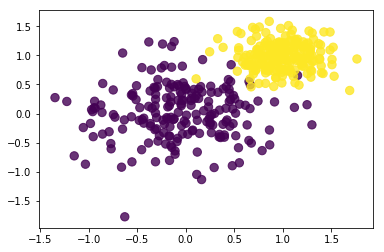

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


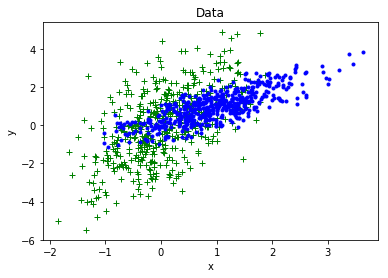

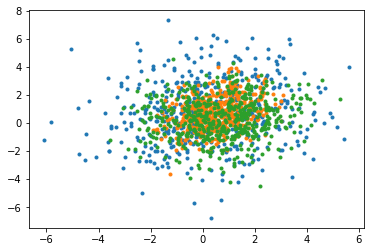

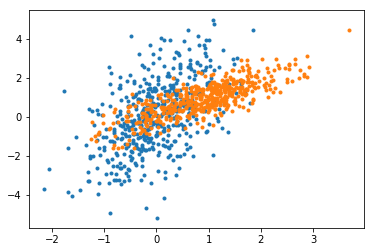

In [25]:
N = 500

mu = [0, 0]
cov = np.matrix( [ [0.5,0.75], [0.75, 3.5] ] )
x1, y1 = np.random.multivariate_normal(mu, cov, N).T #trick
plt.plot( x1, y1,'g+' )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')

mu = [0.9, 0.9]
cov = [[0.7, 0.6], [0.6, 0.8]]
x2, y2  = np.random.multivariate_normal( mu, cov, N).T
plt.plot( x2, y2, 'b.' )
plt.show()


def multi_cat( C=3, N=500, mu=None, cov=None, seed=1234 ):
    
    np.random.seed(seed)

    if mu == None:
        mu = []
        for j in range(C):
            mu.append( np.random.uniform( 0, 1, 2 ) )
    
    # In order to generate a positive-semidefinite covariance matrix
    if cov == None:
        cov = []
        for j in range(C):
            cov_ = np.random.rand(2,2)
            cov_ = cov_ * cov_.T
            # Theoretically, several eigenvalues could be exactly zero. But the computations 
            # with floating point numbers introduce truncation errors which result in some of 
            # those eigenvalues being very small but negative; hence, the matrix is not 
            # positive semidefinite.
            min_eig = np.min(np.real(np.linalg.eigvals(cov_)))
            if min_eig < 0:
                cov_ -= 10*min_eig * np.eye(*cov_.shape)
            cov.append(cov_)
        
    for j in range(C):
        x, y = np.random.multivariate_normal( mu[j], cov[j], N).T
        plt.plot( x, y, '.' )
    
    plt.show()
    
    
    
# Testing
multi_cat(3)
multi_cat(2, mu=[ [0, 0], [0.9, 0.9] ], cov=[[[0.5,0.75], [0.75, 3.5]], [[0.7, 0.6], [0.6, 0.8]]]  )

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

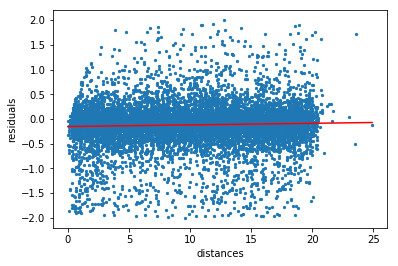

/Users/marcellobullo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


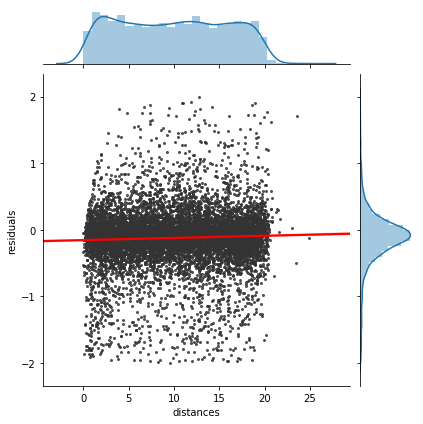

In [108]:
df = pd.DataFrame( np.load('residuals_261.npy').item() ) 
#print( df[ 0:50 ] )
df = df[ np.abs( df['residuals'] ) < 2 ]
lin_reg = sp.stats.linregress( df['distances'], df['residuals'])

plt.scatter( df['distances'], df['residuals'], s=5 )
d_ = np.linspace( np.min( df['distances'] ), np.max( df['distances'] ) )
plt.plot( d_, lin_reg.slope*d_ + lin_reg.intercept, 'r' )
plt.xlabel('distances')
plt.ylabel('residuals')
plt.show()

g = sns.jointplot('distances', 
                  'residuals', 
                  data=df,
                  kind='reg',
                  scatter_kws = {'s':4, 'color':'.2'},
                  line_kws = {'color':'red', 'label':'regression line'}
                 )
#g = g.plot_joint(sns.regplot, cmap="Purples_d")
#g.plot_marginals(sns.kdeplot, color="g", shade=False)
#g.plot_marginals(sns.distplot, kde=True, color="m")
#g.plot_joint(sns.regplot, scatter=False, color='g')